<a href="https://colab.research.google.com/github/Sescallupe/Foot_Ulcer_Segmentation_Challenge/blob/Sergio/Qualityplus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**First we load the libraries**


1) Uninstall opencv 

In [ ]:
!pip uninstall opencv-python
!pip uninstall opencv-contrib-python

Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30
Found existing installation: opencv-contrib-python 4.1.2.30
Uninstalling opencv-contrib-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/opencv_contrib_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-contrib-python-4.1.2.30


2) Install opencv and load again

In [ ]:
!pip3 install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.1 MB 41 kB/s 


3) Download models

In [ ]:
!git clone https://github.com/Saafke/EDSR_Tensorflow.git

Cloning into 'EDSR_Tensorflow'...
remote: Enumerating objects: 149, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 149 (delta 1), reused 0 (delta 0), pack-reused 143
Receiving objects: 100% (149/149), 162.50 MiB | 30.35 MiB/s, done.
Resolving deltas: 100% (77/77), done.


In [ ]:
!git clone https://github.com/Saafke/FSRCNN_Tensorflow.git

Cloning into 'FSRCNN_Tensorflow'...
remote: Enumerating objects: 158, done.
remote: Total 158 (delta 0), reused 0 (delta 0), pack-reused 158
Receiving objects: 100% (158/158), 2.32 MiB | 5.20 MiB/s, done.
Resolving deltas: 100% (56/56), done.


In [ ]:
!git clone https://github.com/fannymonori/TF-LapSRN.git

Cloning into 'TF-LapSRN'...
remote: Enumerating objects: 135, done.
remote: Total 135 (delta 0), reused 0 (delta 0), pack-reused 135
Receiving objects: 100% (135/135), 42.90 MiB | 22.17 MiB/s, done.
Resolving deltas: 100% (12/12), done.


4) Libraries to use

In [ ]:
import os, datetime, glob
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Load images from drive

URL= *"YURDRIVE"_Foot_Ulcer_Segmentation_Challenge/DataBase/VRI/Data_segmentation_DFUS/coor_txt_test/crops_test*

In [ ]:
input_dir = "/content/drive/MyDrive/Foot_Ulcer_Segmentation_Challenge/DataBase/VRI/Data_segmentation_DFUS/coor_txt_test/crops_test"
m=glob.glob(input_dir + "/*.jpg")

In [ ]:
m=np.array(m)
m.shape

(236,)

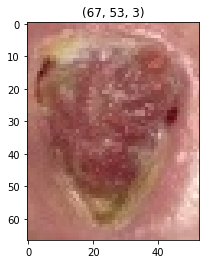

In [ ]:
# Read image
ruta = m[0]
img = cv2.imread(ruta)
plt.imshow(img[:,:,::-1])
plt.title("{}".format(img.shape))
plt.show()



##Evaluating with the methods

By method EDSR_x4

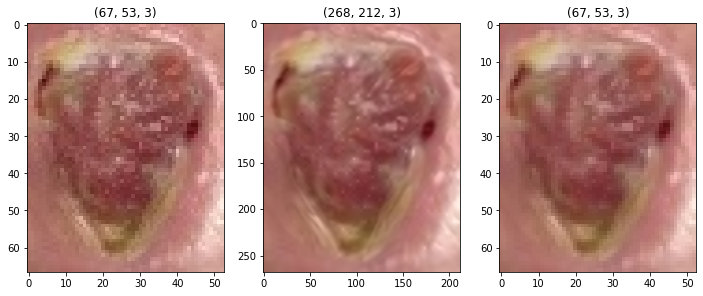

In [ ]:
#armando el modelo
sr = cv2.dnn_superres.DnnSuperResImpl_create()
path = "/content/EDSR_Tensorflow/models/EDSR_x4.pb"
sr.readModel(path)
sr.setModel("edsr",4) 

#Imagen en el modelo
result = sr.upsample(img)
 

# Resized image
dim=(img.shape[1],img.shape[0])
resized = cv2.resize(result, dim, interpolation = cv2.INTER_AREA)
#resized = cv2.resize(img,dsize=None,fx=4,fy=4)

 
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
# Original image
plt.imshow(img[:,:,::-1])
plt.title('{}'.format(img.shape))
plt.subplot(1,3,2)

# SR upscaled
plt.imshow(result[:,:,::-1])
plt.title('{}'.format(result.shape))
plt.subplot(1,3,3)

# OpenCV upscaled
plt.imshow(resized[:,:,::-1])
plt.title('{}'.format(resized.shape))
plt.show()


In [ ]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()
path = "/content/EDSR_Tensorflow/models/EDSR_x4.pb"
sr.readModel(path)
sr.setModel("edsr",4) 
for ruta in m:
  img = cv2.imread(ruta)
  result = sr.upsample(img)
  Text='/content/Imagenes_aumentadas/Qualityplus_{}'.format(ruta.split('/')[-1])
  cv2.imwrite(Text,result)


By method FSRCNN_x3 este modelo se va a usar, pasas toda las imágenes del drive que te pase y guardas la imágenes 'result'

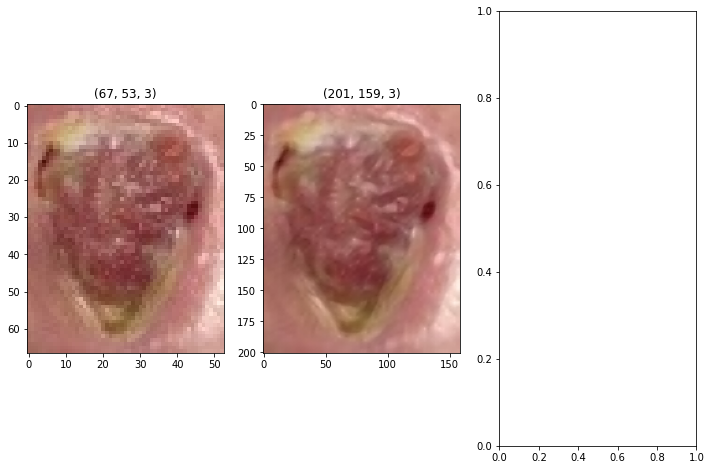

In [ ]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()

path = "/content/FSRCNN_Tensorflow/models/FSRCNN_x3.pb"
sr.readModel(path)
sr.setModel("fsrcnn",3)
result = sr.upsample(img)
 

# Resized image
dim=(img.shape[1],img.shape[0])
resized = cv2.resize(result, dim, interpolation = cv2.INTER_AREA)
#resized = cv2.resize(img,dsize=None,fx=4,fy=4)

 
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
# Original image
plt.imshow(img[:,:,::-1])
plt.title('{}'.format(img.shape))
plt.subplot(1,3,2)

# SR upscaled
plt.imshow(result[:,:,::-1])
plt.title('{}'.format(result.shape))
plt.subplot(1,3,3)
# OpenCV upscaled
#plt.imshow(resized[:,:,::-1])
#plt.title('{}'.format(resized.shape))
#plt.show()

By method LapSRN_x8

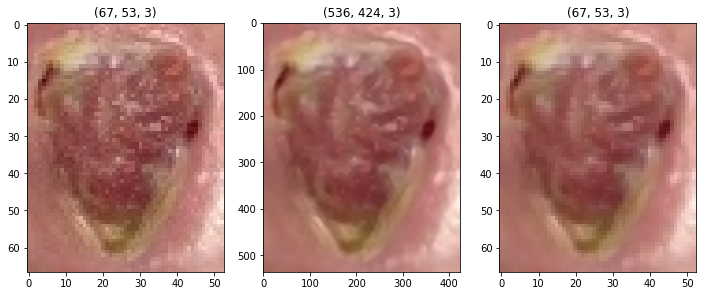

In [ ]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()

path = "/content/TF-LapSRN/export/LapSRN_x8.pb"
sr.readModel(path)
sr.setModel("lapsrn",8)
result = sr.upsample(img)
 

# Resized image
dim=(img.shape[1],img.shape[0])
resized = cv2.resize(result, dim, interpolation = cv2.INTER_AREA)
resized = cv2.resize(img,dsize=None,fx=4,fy=4)

 
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
# Original image
plt.imshow(img[:,:,::-1])
plt.title('{}'.format(img.shape))
plt.subplot(1,3,2)

# SR upscaled
plt.imshow(result[:,:,::-1])
plt.title('{}'.format(result.shape))
plt.subplot(1,3,3)

# OpenCV upscaled
plt.imshow(resized[:,:,::-1])
plt.title('{}'.format(resized.shape))
plt.show()